# AAAI2019 論文標題的文字雲

### 取出論文標題
- 每個csv檔案中的第1行

### 前處理
- 斷詞
- 大小寫統一
- 詞形還原
- 去除stopword

### 顯示文字雲
- 以詞頻顯示
- 以pyplot功能繪圖

In [1]:
import os
import numpy as np
import pandas as pd
from collections import Counter
from enum import Enum
from pprint import pprint
import matplotlib.pyplot as plt

import nltk
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from gensim import corpora, models
from gensim.models import Phrases

from string import punctuation
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from PIL import Image

### 自定義函數

In [2]:
class ContentType(Enum):
    TIT = 'title'
    ABS = 'abstract'
    AUT = 'author'
    SEC = 'section'
    
def get_contents(content_type):
    all_contents = []
    dataset_path = '../dataset'
    for file in os.listdir(dataset_path):
        file_path = os.path.join(dataset_path, file)
        if os.path.isfile(file_path):
            with open(file_path) as f:  
                line = f.readlines()
                if content_type == ContentType.AUT:
                    line = line[1]
                elif content_type == ContentType.SEC:
                    line = line[2]
                elif content_type == ContentType.ABS:
                    line = line[3]
                else:
                    line = line[0]
                line = line.strip()
                all_contents.append(line)
        else:
            print(file_path + ' does not exist.')
    return all_contents


def get_all_titles():
    return get_contents(ContentType.TIT)

def get_all_authors():        
    return get_contents(ContentType.AUT)

def get_all_sections():
    return get_contents(ContentType.SEC)

def get_all_abstracts():
    return get_contents(ContentType.ABS)

def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            token = wordnet_lemmatizer.lemmatize(token, pos='v')
            token = wordnet_lemmatizer.lemmatize(token, pos='n')
            result.append(token)
    return result

### 主程式，開始處理

In [3]:
titles = get_all_titles()
contents = get_all_abstracts()

print(contents[:100])

['We consider the problem of actively eliciting preferences from a Decision Maker supervising a collective decision process in the context of fair multiagent combinatorial optimization. Individual preferences are supposed to be known and represented by linear utility functions defined on a combinatorial domain and the social utility is defined as a generalized Gini Social evaluation Function (GSF) for the sake of fairness. The GSF is a non-linear aggregation function parameterized by weighting coefficients which allow a fine control of the equity requirement in the aggregation of individual utilities. The paper focuses on the elicitation of these weights by active learning in the context of the fair multiagent knapsack problem. We introduce and compare several incremental decision procedures interleaving an adaptive preference elicitation procedure with a combinatorial optimization algorithm to determine a GSF-optimal solution. We establish an upper bound on the number of queries and p

In [4]:
documents = pd.DataFrame(data=contents,columns=['abstract'])
processed_docs = documents['abstract'].map(preprocess)
processed_docs[:10]

0    [consider, problem, actively, elicit, preferen...
1    [investigate, task, distractor, generation, mu...
2    [common, representation, formalism, plan, desc...
3    [statistical, relational, learn, model, powerf...
4    [multimodal, representation, learn, gain, deep...
5    [reinforcement, learn, show, advantage, image,...
6    [select, appropriate, tutor, help, action, acc...
7    [recognize, time, expression, fundamental, imp...
8    [face, large, scale, image, datasets, online, ...
9    [temporal, model, video, fundamental, challeng...
Name: abstract, dtype: object

### 產生文字雲(方式一：用plt)

In [5]:
tokens_preporcessed = []
for d in processed_docs:
    tokens_preporcessed = tokens_preporcessed + d
    
print(len(tokens_preporcessed))
print(tokens_preporcessed[:10])

121739
['consider', 'problem', 'actively', 'elicit', 'preference', 'decision', 'maker', 'supervise', 'collective', 'decision']


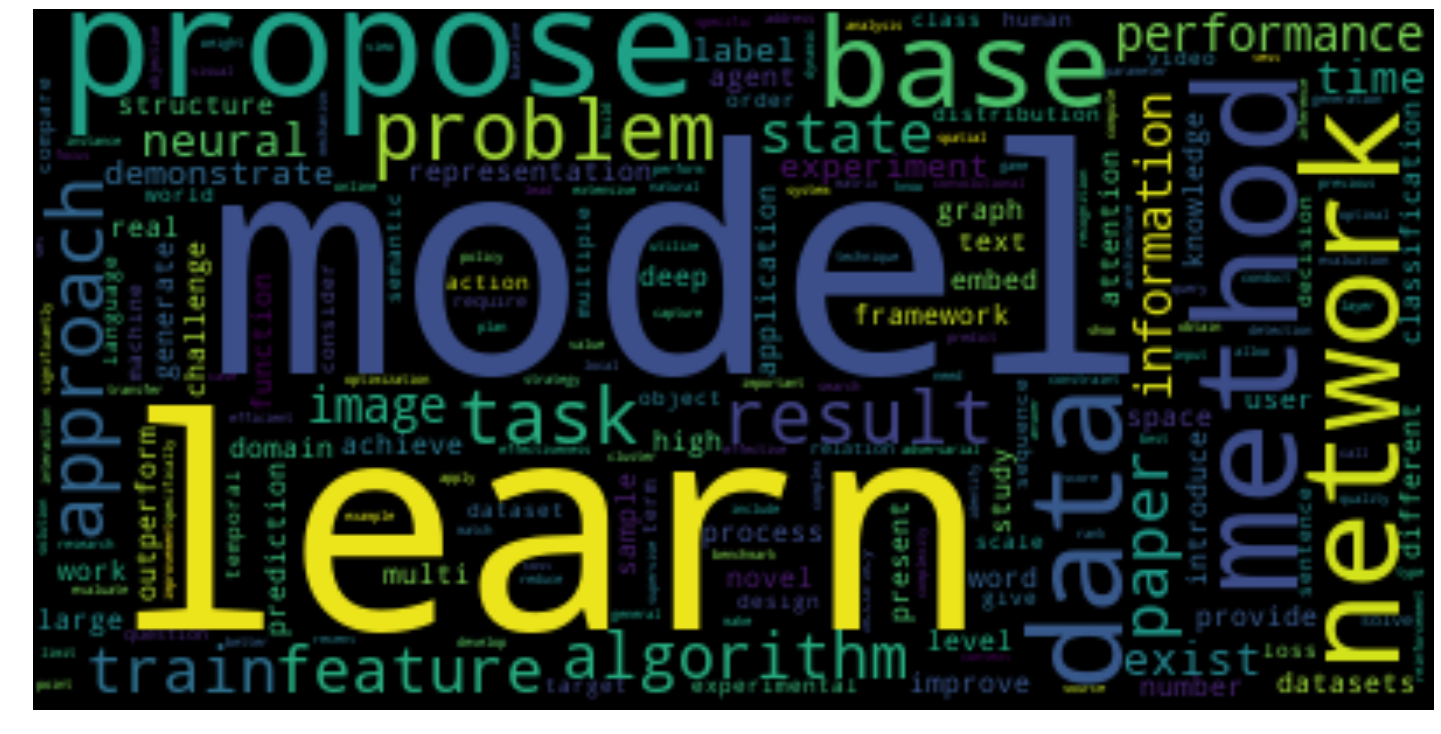

In [6]:
#wc = WordCloud().generate(tokens_preporcessed)
wc = WordCloud().generate_from_frequencies(frequencies=Counter(tokens_preporcessed))

plt.figure(figsize=(20,10), facecolor='w')
plt.imshow(wc,interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

### 方式二：用word cloud

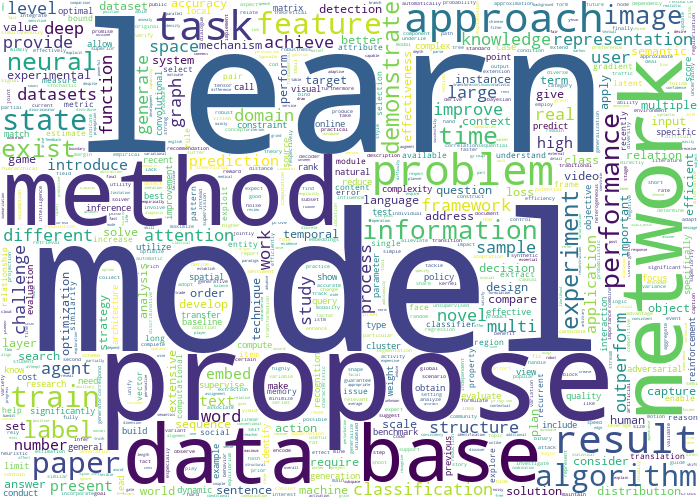

In [7]:
font_path = '../tools/msjh.ttc'
mask = np.array(Image.open("../images/square.png"))

wc2 = WordCloud(background_color = "white",
                       max_words = 2000,
                       mask = mask,
                       max_font_size = None,
                       #font_path = font_path,
                       random_state = None,
                       prefer_horizontal = 0.9,
                       contour_width = 3,
                       contour_color = 'steelblue')
#wc2.generate(contents)
wc2.generate_from_frequencies(frequencies=Counter(tokens_preporcessed))
wc2.to_image()